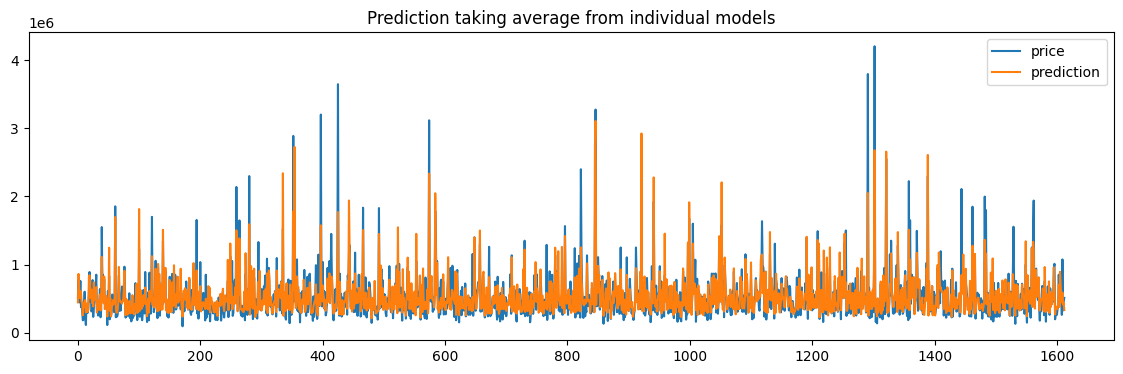

In [2]:
from sklearn.ensemble import GradientBoostingRegressor  
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.ensemble import GradientBoostingRegressor

file = "data/kc_house_data_train.csv"
chunksize = 5000
models = []
for chunk in pd.read_csv(file, chunksize=chunksize):
    model = GradientBoostingRegressor()
    features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built']
    model.fit(chunk[features], chunk['price'])
    models.append(model)

df_test = pd.read_csv("data/kc_house_data_test.csv")
predictions = np.mean([model.predict(df_test[features]) for model in models], axis=0)
plt.figure(figsize=(14, 4))
plt.plot(df_test['price'], label='price')
plt.plot(predictions, label='prediction')
plt.title('Prediction taking average from individual models')
plt.legend()
plt.show()


Text(0, 0.5, 'mean absolute percentage error (%)')

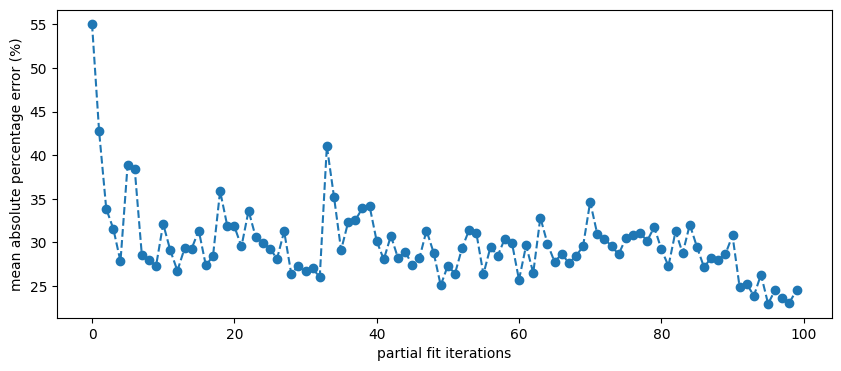

In [4]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error

file = "data/kc_house_data_train.csv"
chunksize = 200
improvements = []
SGD = SGDRegressor(loss='squared_error', penalty='l2', alpha=0.0001)
scaler = StandardScaler()

for chunk in pd.read_csv(file, chunksize=chunksize): 
    features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built']
    scaler.partial_fit(chunk[features])
    X_scaled = scaler.transform(chunk[features])
    SGD.partial_fit(X_scaled, chunk['price'])
    mape = mean_absolute_percentage_error(chunk['price'], SGD.predict(X_scaled))
    improvements.append(mape*100)

plt.figure(figsize=(10,4))
plt.plot(improvements, 'o--')
plt.xlabel('partial fit iterations')
plt.ylabel('mean absolute percentage error (%)')


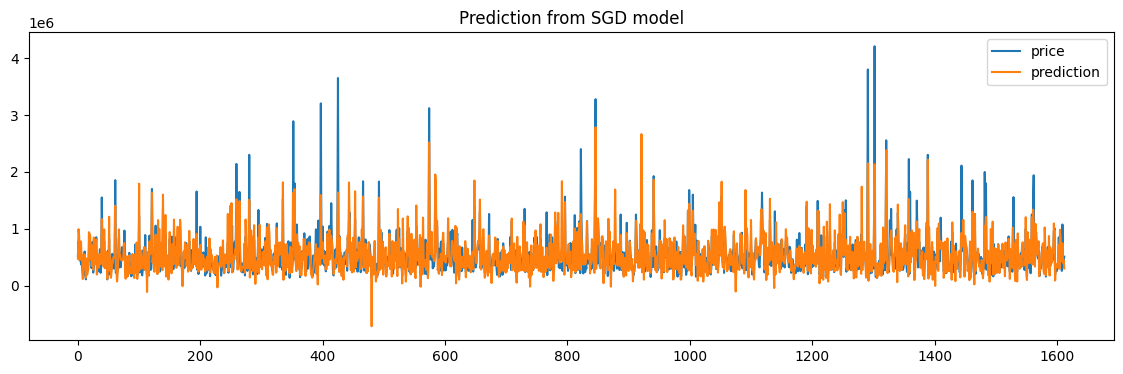

In [5]:
df_test = pd.read_csv("data/kc_house_data_test.csv")
X_test = scaler.transform(df_test[features])
predictions = SGD.predict(X_test)

plt.figure(figsize=(14, 4))
plt.plot(df_test['price'], label='price')
plt.plot(predictions, label='prediction')
plt.title('Prediction from SGD model')
plt.legend()
plt.show()
